<a href="https://colab.research.google.com/github/rishabmps/Reinforcement-learning-Practice/blob/master/taxi_gym_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

def plot_values(V):
	# reshape the state-value function
	# plot the state-value function
  V = np.reshape(V, (4,12))
  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(111)
  # 	im = ax.imshow(V, cmap='cool')
  for (j,i),label in np.ndenumerate(V):
      ax.text(i, j, np.round(label,3), ha='center', va='center', fontsize=14)
  plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
  plt.title('State-Value Function')
  plt.show()

In [0]:
#  Agent

import numpy as np
from collections import defaultdict

class Agent:

    def __init__(self, nA=6):
        """ Initialize agent.

        Params
        ======
        - nA: number of actions available to the agent
        """
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.epsilon = .1
        self.min_eps = .005
        self.alpha = .07
        self.gamma = 0.9

    def select_action(self, state,i_episode):
        """ Given the state, select an action.

        Params
        ======
        - state: the current state of the environment

        Returns
        =======
        - action: an integer, compatible with the task's action space
        """
        policy_s = self.epsilon_greedy_prob(state,i_episode)
        
        
        
        return np.random.choice(np.arange(self.nA),p = policy_s)

    def step(self, state, action, reward, next_state, done):
        """ Update the agent's knowledge, using the most recently sampled tuple.

        Params
        ======
        - state: the previous state of the environment
        - action: the agent's previous choice of action
        - reward: last reward received
        - next_state: the current state of the environment
        - done: whether the episode is complete (True or False)
        """
        self.Q[state][action] += self.alpha*(reward+self.gamma*(np.max(self.Q[next_state])) - self.Q[state][action] )
    
    def epsilon_greedy_prob(self,state,i_episode,eps = None):
      self.epsilon = 1/i_episode
      if self.epsilon < self.min_eps:
        self.epsilon = self.min_eps
      policy_s = np.ones(self.nA)*self.epsilon/self.nA
      policy_s[np.argmax(self.Q[state])] = 1 - self.epsilon + (self.epsilon/self.nA)
      return policy_s
    
    
      

In [0]:
# Monitor

from collections import deque
import sys
import math
import numpy as np

def interact(env, agent, num_episodes=20000, window=100):
    """ Monitor agent's performance.
    
    Params
    ======
    - env: instance of OpenAI Gym's Taxi-v1 environment
    - agent: instance of class Agent (see Agent.py for details)
    - num_episodes: number of episodes of agent-environment interaction
    - window: number of episodes to consider when calculating average rewards

    Returns
    =======
    - avg_rewards: deque containing average rewards
    - best_avg_reward: largest value in the avg_rewards deque
    """
    # initialize average rewards
    avg_rewards = deque(maxlen=num_episodes)
    # initialize best average reward
    best_avg_reward = -math.inf
    # initialize monitor for most recent rewards
    samp_rewards = deque(maxlen=window)
    # for each episode
    for i_episode in range(1, num_episodes+1):
        # begin the episode
        state = env.reset()
        # initialize the sampled reward
        samp_reward = 0
        while True:
            # agent selects an action
            action = agent.select_action(state,i_episode)
            # agent performs the selected action
            next_state, reward, done, _ = env.step(action)
            # agent performs internal updates based on sampled experience
            agent.step(state, action, reward, next_state, done)
            # update the sampled reward
            samp_reward += reward
            # update the state (s <- s') to next time step
            state = next_state
            if done:
                # save final sampled reward
                samp_rewards.append(samp_reward)
                break
        if (i_episode >= 100):
            # get average reward from last 100 episodes
            avg_reward = np.mean(samp_rewards)
            # append to deque
            avg_rewards.append(avg_reward)
            # update best average reward
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
        # monitor progress
        print("\rEpisode {}/{} || Best average reward {}".format(i_episode, num_episodes, best_avg_reward), end="")
        sys.stdout.flush()
        # check if task is solved (according to OpenAI Gym)
        if best_avg_reward >= 9.7:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            break
        if i_episode == num_episodes: print('\n')
    return avg_rewards, best_avg_reward

In [19]:
# main


import gym
import numpy as np

env = gym.make('Taxi-v2')
agent = Agent()
avg_rewards, best_avg_reward = interact(env, agent)


Episode 20000/20000 || Best average reward 9.13



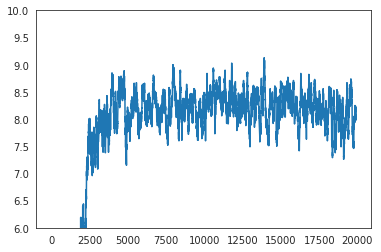

In [20]:
plt.plot(avg_rewards)
plt.ylim([6, 10])
plt.show()

In [0]:
env.action_space

Discrete(6)

In [0]:
env.observation_space

Discrete(500)